In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Grouped bars: par_base vs rayon_base

<Axes: xlabel='file', ylabel='time[ms]'>

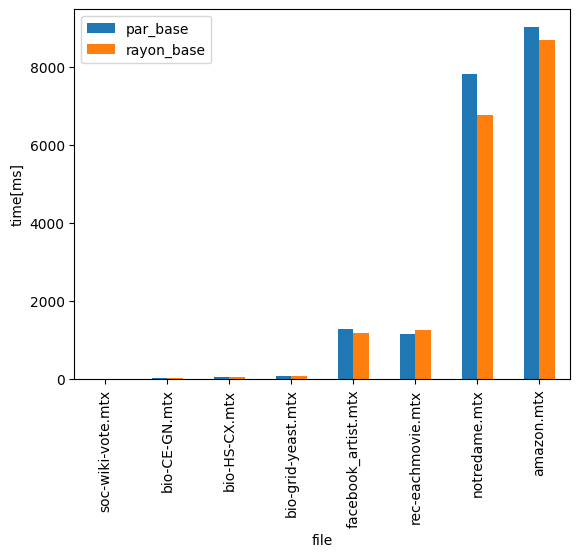

In [2]:
info = pd.read_csv("(real)par_vs_rayon.csv")

info\
    .sort_values(by=["nodes"])\
    .filter(items=["file", "par_base", "rayon_base"])\
    .plot(x="file", ylabel="time[ms]", kind="bar", stacked=False)


<Axes: xlabel='file', ylabel='time[ms]'>

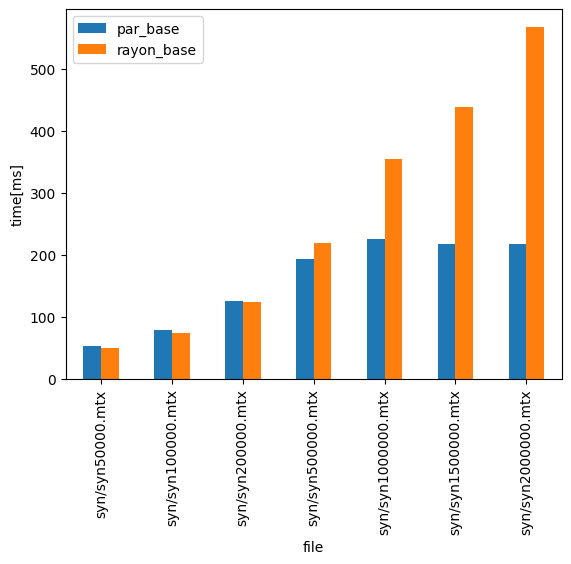

In [3]:
info = pd.read_csv("(syn)par_vs_rayon.csv")

info\
    .sort_values(by=["nodes"])\
    .filter(items=["file", "par_base", "rayon_base"])\
    .plot(x="file", ylabel="time[ms]", kind="bar", stacked=False)

## Different \#threads comparison

<Axes: title={'center': 'Different #threads w/ facebook_artist (local)'}, xlabel='num_threads', ylabel='time[ms]'>

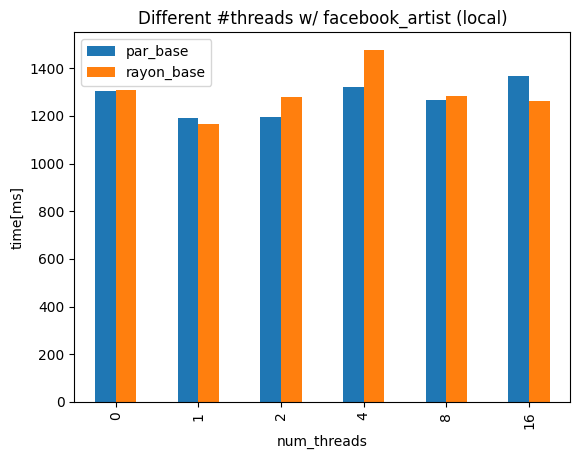

In [4]:
info = pd.read_csv("facebook_diff_thread.csv")

info\
    .filter(items=["num_threads", "par_base", "rayon_base"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, legend=True, title="Different #threads w/ facebook_artist (local)")

<Axes: title={'center': 'Different #threads w/ syn500_000 (titanium)'}, xlabel='num_threads', ylabel='time[ms]'>

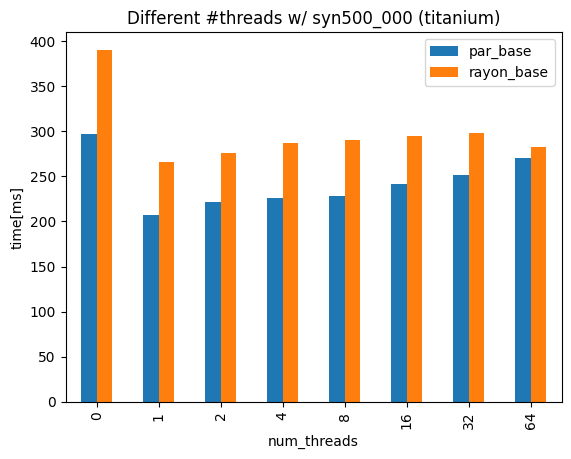

In [5]:
info = pd.read_csv("500k_diff_thread.csv")

info\
    .filter(items=["num_threads", "par_base", "rayon_base"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="Different #threads w/ syn500_000 (titanium)")

## Rusty-CRACKER vs Spark-CRACKER

<Axes: title={'center': 'Rust vs Spark w/ syn_50k_50k (local)'}, xlabel='num_threads', ylabel='time[ms]'>

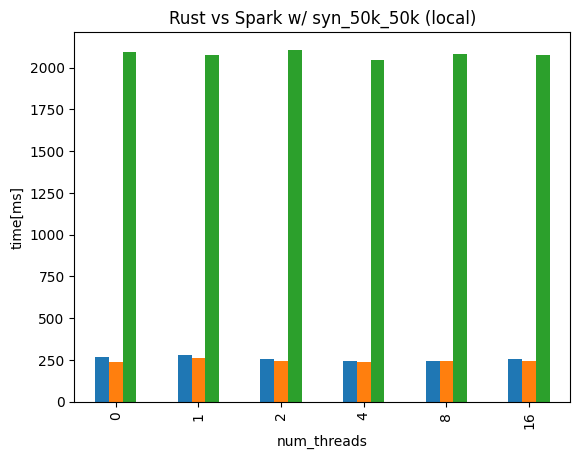

In [8]:
info = pd.read_csv("syn_50k_50k_RustvsSpark.csv")

info\
    .filter(items=["num_threads", "par_base", "rayon_base", "spark"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="Rust vs Spark w/ syn_50k_50k (local)", legend=None)

<Axes: title={'center': 'Rust vs Spark w/ syn_50k_2M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

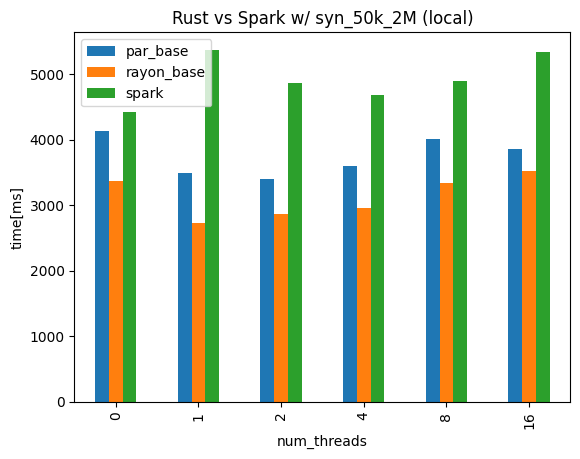

In [7]:
info = pd.read_csv("syn_50k_2M_RustvsSpark.csv")

info\
    .filter(items=["num_threads", "par_base", "rayon_base", "spark"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="Rust vs Spark w/ syn_50k_2M (local)")